# Top-50 Spotify Tracks of 2020 Analysis

**Link to the dataset:**
https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020

**Info about the data from the link above:**

* **energy** (Ranges from 0 to 1)
    Higher value means that the songs is more energetic.
* **danceability** (Ranges from 0 to 1)
    Higher value means that it is easier to dance to the song.
* **instrumentalness** (Ranges from 0 to 1)
    Describes whether a track contains no vocals. If the instrumentalness is closer to '1', the song is more likely to have no vocals.
* **valence** (Ranges from 0 to 1)
    Describes the positiveness of a song. Higher valence means that the song sounds more positive.
* **acousticness** (Ranges from 0 to 1)
    This value describes how acoustic a song is.
* **duration_ms**( Generally has a range of 200k-400k)
    The length of the song in milliseconds.
* **liveness** (Ranges from 0 to 1)
    Describes the likelihood that the song was recorded with a live audience.
* **speechiness** (Ranges from 0 to 1)
    Speechiness detects the presence of spoken words in a track.
* **tempo**
    Бeats per minute.
* **loudness**
    Higher value means that the song is louder.
* **artist**
    Name of the artist.
* **track_name**
    Name of the song.
* **key**
    The primary identifier of songs.
* **genre**
    Genre of the song.
* **album**
    Name of the album that the song is on.

## 1. Importing the libraries and data

In [546]:
import pandas as pd
import numpy as np
import missingno as msno
from heatmap import corrplot
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [547]:
data = pd.read_csv("spotifytoptracks.csv", index_col=0)
data.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usag

In [549]:
data.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


**Note:**
Since variable "key" is actually categorical(it is the primary identifier of songs), but has dtype of an integer, we will change the dtype of this variable to "object".

In [550]:
# change the type of the "key" column to object
data["key"] = data["key"].astype("object")

## 2. Data Cleaning

### 2.1. Handling missing values

<Axes: >

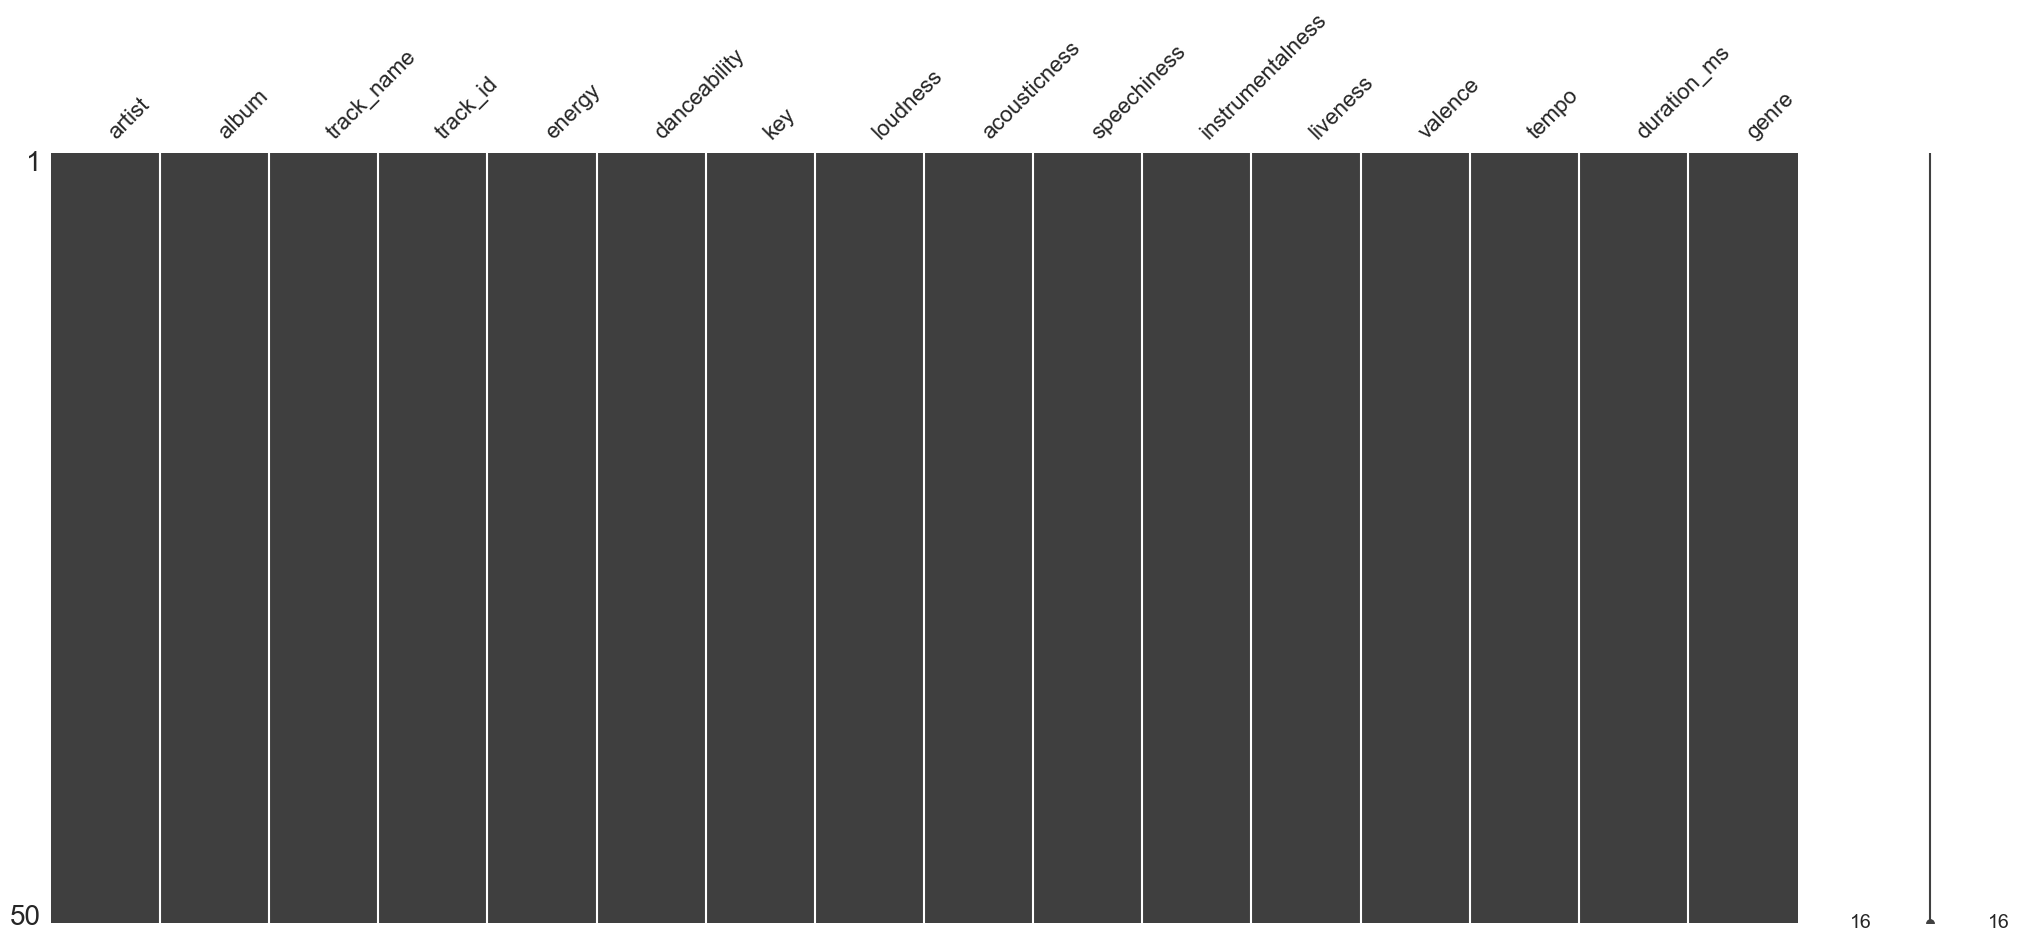

In [551]:
# matrix showing the location of missing values
msno.matrix(data)

<Axes: >

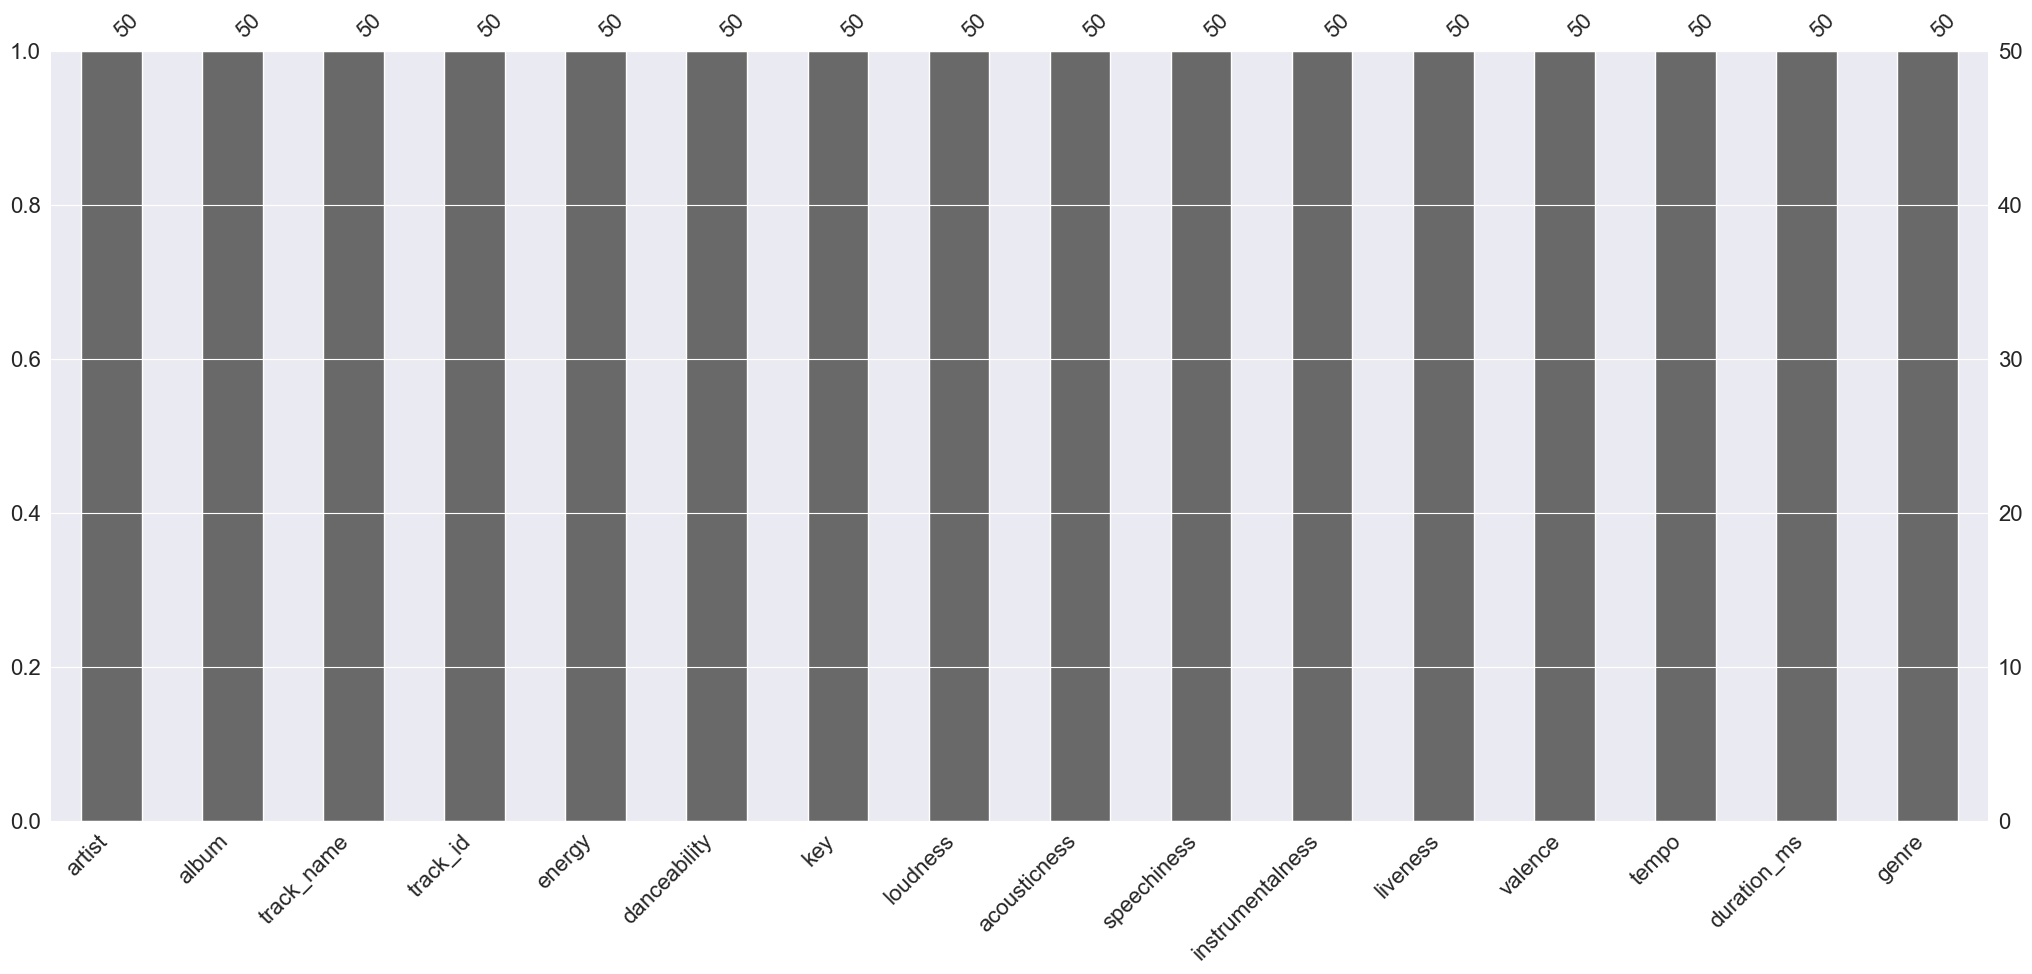

In [552]:
# bar plot showing the proportion of missing values
msno.bar(data)

In [553]:
# count missing values
data.isna().sum()

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

In [554]:
# proportion of missing values
data.isna().sum() / data.count()

artist              0.0
album               0.0
track_name          0.0
track_id            0.0
energy              0.0
danceability        0.0
key                 0.0
loudness            0.0
acousticness        0.0
speechiness         0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
genre               0.0
dtype: float64

In [555]:
# proportion of existing values (if 1, there are no missing values)
data.notna().sum() / data.count()

artist              1.0
album               1.0
track_name          1.0
track_id            1.0
energy              1.0
danceability        1.0
key                 1.0
loudness            1.0
acousticness        1.0
speechiness         1.0
instrumentalness    1.0
liveness            1.0
valence             1.0
tempo               1.0
duration_ms         1.0
genre               1.0
dtype: float64

### Conclusion:

There are no missing values in this dataset.

### 2.2. Removing duplicate samples and features

In [556]:
len(data)-len(data.drop_duplicates()) # count duplicate values

0

In [557]:
data[data.duplicated()] # get duplicated rows

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre


In [558]:
len(data) == len(data.drop_duplicates()) # see if the length of data changes when we drop duplicate values

True

In [559]:
data.drop_duplicates(keep="first", inplace=True) # drop duplicates if there are any

In [560]:
len(data.columns.tolist()) == len(set(data.columns.tolist())) # see if there are duplicate columns

True

Let's have a general look of the columns:

In [561]:
data.head(5)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


We can see the column "track_id". This is a unique ID of the song. It's basically like an index for all of the songs, so we can omit it in further analysis.

In [562]:
# let's check one more time whether we have unique
# ids for each observation:
data.track_id.nunique()

50

We can see that there are unique IDs for each observation, so let's delete this redundant column:

In [563]:
# delete column "track_id" since it gives us no additional info
del data["track_id"]

In [564]:
data.columns

Index(['artist', 'album', 'track_name', 'energy', 'danceability', 'key',
       'loudness', 'acousticness', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'genre'],
      dtype='object')

### Conclusion:

There are no duplicate values in this dataset. And there was one redundant feature called "track_id".

### 2.3. Handling outliers

**What are outliers?**

An outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

In [565]:
# standardize the dataframe for better visualization of outliers
standard_df=(data-data.mean(numeric_only=True))/data.std(numeric_only=True)

<Axes: >

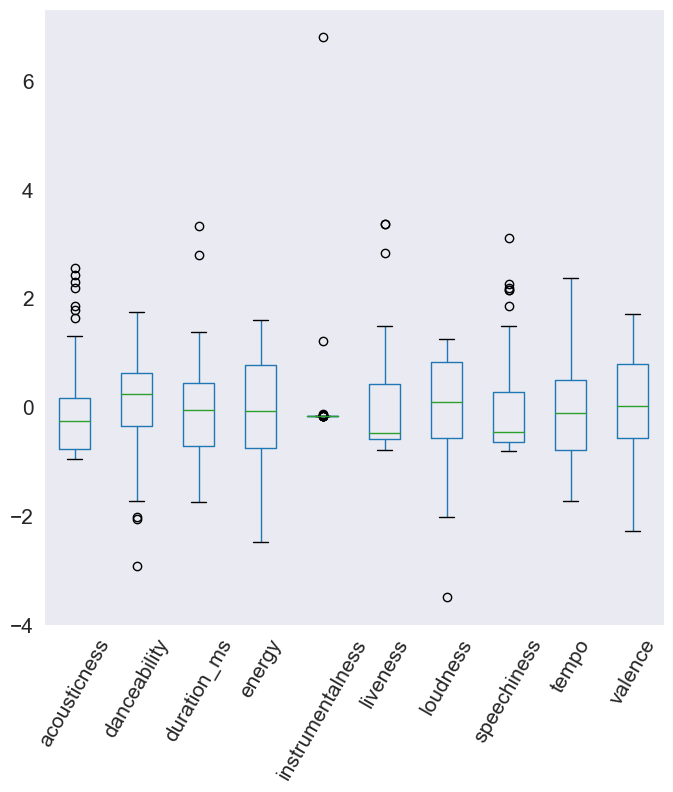

In [566]:
# visualize the boxplot for the columns of the standardized dataframe
standard_df.boxplot(grid=False, rot=60, fontsize=15, figsize=(8, 8))

In the plot above, we can observe that multiple columns (numeric) have statistically significant outliers. These columns are:

* acousticness
* danceability
* duration_ms
* instrumentalness
* liveness
* loudness
* speechiness

**Note**:
we have used a standardized dataframe for the visualization since we have different ranges for columns, and standardization (mean=0, standard deviation=1) as a scaling technique works well with outliers.

**How can we handle outliers?**

The common methods of treating the outliers are:

* **Trimming/removing the outlier**
    In this technique, we remove the outliers from the dataset. It's better when we suspect the outliers are merely errors and the outlier value is physically impossible.
* **Quantile based flooring and capping**
    In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.
    The data points that are lesser than the 10th percentile are replaced with the 10th percentile value and the data points that are greater than the 90th percentile are replaced with 90th percentile value.
* **Mean/Median imputation**
    Replace the outliers with the mean/median value. As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.
* **Rescaling the data**
    We can apply different scale transformations to data. E.g. robust data scaling.


In our dataset, the outliers still lay generally in the probable range, so we cannot consider them erroneous observations. And since our dataset is very small, removing the outliers would result in poor data.

Choosing between all the other methods of handling outliers, it's tempting to leave everything as it is, since we are not training a machine learning model here, everything is in acceptable range, and in further analysis we will answer questions with certain thresholds.

But, for the sake of our curiosity, let's try quantile based flooring and capping (with 5% as floor and 95% as cap). Thus, we will get rid of only extreme outliers.

**Note**: we will use the data with original outliers in our analysis afterwards.

In [616]:
# perform quantile based flooring and capping
pd.options.mode.chained_assignment = None
floor_cap_data = data.copy(deep=True)
for col in floor_cap_data.select_dtypes(exclude="object").columns:
    percentiles = floor_cap_data.loc[:, col].quantile([0.05, 0.95]).values
    floor_cap_data.loc[:, col][floor_cap_data[col] <= percentiles[0]] = percentiles[0]
    floor_cap_data.loc[:, col][floor_cap_data[col] >= percentiles[1]] = percentiles[1]

In [568]:
floor_cap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   energy            50 non-null     float64
 4   danceability      50 non-null     float64
 5   key               50 non-null     object 
 6   loudness          50 non-null     float64
 7   acousticness      50 non-null     float64
 8   speechiness       50 non-null     float64
 9   instrumentalness  50 non-null     float64
 10  liveness          50 non-null     float64
 11  valence           50 non-null     float64
 12  tempo             50 non-null     float64
 13  duration_ms       50 non-null     float64
 14  genre             50 non-null     object 
dtypes: float64(10), object(5)
memory usage: 6.2+ KB


<Axes: >

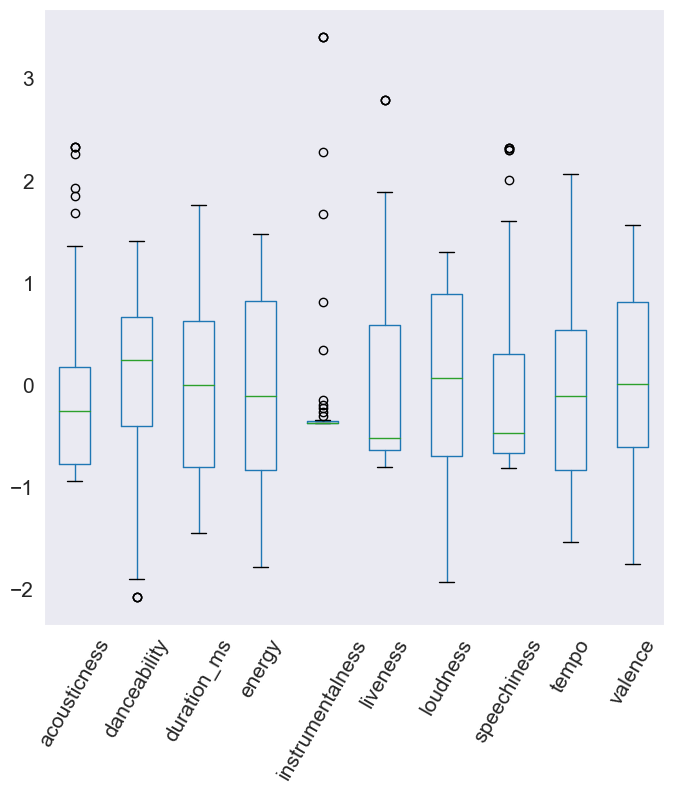

In [569]:
# standardize the dataframe for better visualization
standard_floor_cap_data=(floor_cap_data-\
                           floor_cap_data.mean(numeric_only=True))/floor_cap_data.std(numeric_only=True)
standard_floor_cap_data.boxplot(grid=False, rot=60, fontsize=15, figsize=(8, 8))

In the plot above, we can see that the range of y-axis has changed since we got rid of the most extreme outliers.

## 3. Performing the Exploratory Data Analysis (EDA)

### 3.1. Answering general questions:

* How many observations are there in this dataset?
* How many features this dataset has?
* Which of the features are categorical?
* Which of the features are numeric?

In [570]:
# How many observations are there in this dataset
data.count()

artist              50
album               50
track_name          50
energy              50
danceability        50
key                 50
loudness            50
acousticness        50
speechiness         50
instrumentalness    50
liveness            50
valence             50
tempo               50
duration_ms         50
genre               50
dtype: int64

In [571]:
# get shape of the dataset
n_rows, n_cols = data.shape
print (f"There are {n_rows} observations.")
print (f"There are {n_cols} variables.")

There are 50 observations.
There are 15 variables.


Now, let's find out categorical and numerical columns:

In [572]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   energy            50 non-null     float64
 4   danceability      50 non-null     float64
 5   key               50 non-null     object 
 6   loudness          50 non-null     float64
 7   acousticness      50 non-null     float64
 8   speechiness       50 non-null     float64
 9   instrumentalness  50 non-null     float64
 10  liveness          50 non-null     float64
 11  valence           50 non-null     float64
 12  tempo             50 non-null     float64
 13  duration_ms       50 non-null     int64  
 14  genre             50 non-null     object 
dtypes: float64(9), int64(1), object(5)
memory usage: 6.2+ KB


In [573]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"There are {len(categorical_cols)} categorical columns.")
print("-"*20)
print(f"Numerical columns: {numerical_cols}")
print(f"There are {len(numerical_cols)} numerical columns.")

Categorical columns: ['artist', 'album', 'track_name', 'key', 'genre']
There are 5 categorical columns.
--------------------
Numerical columns: ['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
There are 10 numerical columns.


**Conclusion:**

There are 50 observations and 15 variables.

Numerical variables are:
* energy (Ranges from 0 to 1)
* danceability (Ranges from 0 to 1)
* instrumentalness (Ranges from 0 to 1)
* valence (Ranges from 0 to 1)
* acousticness (Ranges from 0 to 1)
* duration_ms( Generally has a range of 200k-400k)
* liveness (Ranges from 0 to 1)
* speechiness (Ranges from 0 to 1)
* tempo
* loudness

Categorical variables are:
* artist
* track_name
* key
* genre
* album

### 3.2. Answering specific questions about the dataset

**(3.2.1) Are there any artists that have more than 1 popular track? If yes, which and how many?**

In [574]:
grouped_data = data.groupby(["artist"]).count().sort_values(by=["track_name"], ascending=False)
grouped_data

,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
artist,,,,,,,,,,,,,,
Travis Scott,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Billie Eilish,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Dua Lipa,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Justin Bieber,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Post Malone,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Harry Styles,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Lewis Capaldi,2,2,2,2,2,2,2,2,2,2,2,2,2,2
24kGoldn,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Roddy Ricch,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [575]:
popular_artists = grouped_data[grouped_data.track_name > 1].track_name
pop_artists_list = popular_artists.index.values.tolist()
print (f"There are {len(popular_artists)} artists who have more than one popular track.")
print ("-"*20)
for artist in popular_artists.index:
    print (f"{artist} has {popular_artists.loc[artist]} popular tracks.")

There are 7 artists who have more than one popular track.
--------------------
Travis Scott has 3 popular tracks.
Billie Eilish has 3 popular tracks.
Dua Lipa has 3 popular tracks.
Justin Bieber has 2 popular tracks.
Post Malone has 2 popular tracks.
Harry Styles has 2 popular tracks.
Lewis Capaldi has 2 popular tracks.


In [576]:
# get a dataframe slice with track names for the artists above
data[data.artist.isin(pop_artists_list)][["artist", "track_name"]].sort_values(by=["artist"],
                                                                               ignore_index=True)

,artist,track_name
0,Billie Eilish,bad guy
1,Billie Eilish,lovely (with Khalid)
2,Billie Eilish,everything i wanted
3,Dua Lipa,Break My Heart
4,Dua Lipa,Physical
5,Dua Lipa,Don't Start Now
6,Harry Styles,Adore You
7,Harry Styles,Watermelon Sugar
8,Justin Bieber,Intentions (feat. Quavo)
9,Justin Bieber,Yummy


**Conclusion:**
As shown in the output of the cell above, there are 7 artists who have more than one popular track.

**(3.2.2) Who was the most popular artist?**

In [577]:
data.artist.mode()

0    Billie Eilish
1         Dua Lipa
2     Travis Scott
Name: artist, dtype: object

**Conclusion:**
There are three most popular artists:
* Billie Eilish
* Dua Lipa
* Travis Scott


**(3.2.3) How many artists in total have their songs in the top 50?**

In [578]:
data.artist.nunique()

40

**Conclusion:**
There are 40 artists in total who have their songs in the top 50.

**(3.2.3) Are there any albums that have more than 1 popular track? If yes, which and how many?**

In [579]:
group_by_album = data.groupby(["album"]).count().sort_values(by=["track_name"], ascending=False)
group_by_album

,artist,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
album,,,,,,,,,,,,,,
Future Nostalgia,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Fine Line,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Hollywood's Bleeding,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Changes,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ASTROWORLD,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Please Excuse Me For Being Antisocial,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ROXANNE,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Ride It,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Roses (Imanbek Remix),1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [580]:
popular_albums = group_by_album[group_by_album.track_name > 1].track_name
popular_albums_list = popular_albums.index.values.tolist()
print (f"There are {len(popular_albums)} albums that have more than one popular track.")
print ("-"*20)
for album in popular_albums.index:
    print (f"{album} has {popular_albums.loc[album]} popular tracks.")

There are 4 albums that have more than one popular track.
--------------------
Future Nostalgia has 3 popular tracks.
Fine Line has 2 popular tracks.
Hollywood's Bleeding has 2 popular tracks.
Changes has 2 popular tracks.


In [581]:
# get a dataframe slice with track names for the albums above
data[data.album.isin(popular_albums_list)][["album", "track_name"]].sort_values(by=["album"],
                                                                               ignore_index=True)

,album,track_name
0,Changes,Intentions (feat. Quavo)
1,Changes,Yummy
2,Fine Line,Watermelon Sugar
3,Fine Line,Adore You
4,Future Nostalgia,Don't Start Now
5,Future Nostalgia,Break My Heart
6,Future Nostalgia,Physical
7,Hollywood's Bleeding,Circles
8,Hollywood's Bleeding,Sunflower - Spider-Man: Into the Spider-Verse


**Conclusion:**
As shown in the output of the cells above, there are 4 albums that have more than one popular track.

**(3.2.4) How many albums in total have their songs in the top 50?**

In [582]:
data.album.nunique()

45

**Conclusion:**
There are 45 albums in total that have their songs in the top 50.

**(3.2.5)**
**Which tracks have a danceability score above 0.7?**
**Which tracks have a danceability score below 0.4?**

In [583]:
top_danceability = data[data.danceability > 0.7][["track_name",
                                                  "danceability"]].sort_values(by="danceability",
                                                                               ignore_index=True,
                                                                               ascending=False)
top_danceability

,track_name,danceability
0,WAP (feat. Megan Thee Stallion),0.935
1,The Box,0.896
2,Ride It,0.880
3,Sunday Best,0.878
4,Supalonely (feat. Gus Dapperton),0.862
5,goosebumps,0.841
6,SICKO MODE,0.834
7,Toosie Slide,0.830
8,Dance Monkey,0.825
9,Godzilla (feat. Juice WRLD),0.808


In [584]:
lower_danceability = data[data.danceability < 0.4][["track_name",
                                                    "danceability"]].sort_values(by="danceability",
                                                                               ignore_index=True,
                                                                               ascending=True)
lower_danceability

,track_name,danceability
0,lovely (with Khalid),0.351


**Conclusion:**
There are 32 tracks that have danceability score above 0.7, and 1 track with score below 0.4 (See tha names of tracks in cell outputs above).

**(3.2.6)**
**Which tracks have their loudness above -5?**
**Which tracks have their loudness below -8?**

In [585]:
top_loudness = data[data.loudness > -5][["track_name",
                                                  "loudness"]].sort_values(by="loudness",
                                                                               ignore_index=True,
                                                                               ascending=False)
top_loudness

,track_name,loudness
0,Tusa,-3.280
1,goosebumps,-3.370
2,Break My Heart,-3.434
3,Hawái,-3.454
4,Circles,-3.497
5,Mood (feat. iann dior),-3.558
6,Adore You,-3.675
7,SICKO MODE,-3.714
8,Physical,-3.756
9,Rain On Me (with Ariana Grande),-3.764


In [586]:
low_loudness = data[data.loudness < -8][["track_name",
                                        "loudness"]].sort_values(by="loudness",
                                                                ignore_index=True,
                                                                ascending=True)
low_loudness

,track_name,loudness
0,everything i wanted,-14.454
1,bad guy,-10.965
2,lovely (with Khalid),-10.109
3,If the World Was Ending - feat. Julia Michaels,-10.086
4,Toosie Slide,-8.820
5,death bed (coffee for your head),-8.765
6,HIGHEST IN THE ROOM,-8.764
7,Falling,-8.756
8,Savage Love (Laxed - Siren Beat),-8.520


**(3.2.7)**
**Which track is the longest?**
**Which track is the shortest?**

In [587]:
# the longest track
data[data.duration_ms == data.duration_ms.max()][["track_name", "artist", "duration_ms"]]

,track_name,artist,duration_ms
49,SICKO MODE,Travis Scott,312820


In [588]:
# the shortest track
data[data.duration_ms == data.duration_ms.min()][["track_name", "artist", "duration_ms"]]

,track_name,artist,duration_ms
23,Mood (feat. iann dior),24kGoldn,140526


**Conclusion:**
The longest track is "SICKO MODE" by Travis Scott, and the shortest track is "Mood (feat. iann dior)" by 24KGoldn.

**(3.2.8)**
**Which genre is the most popular?**

In [589]:
data.genre.mode()

0    Pop
Name: genre, dtype: object

<Axes: >

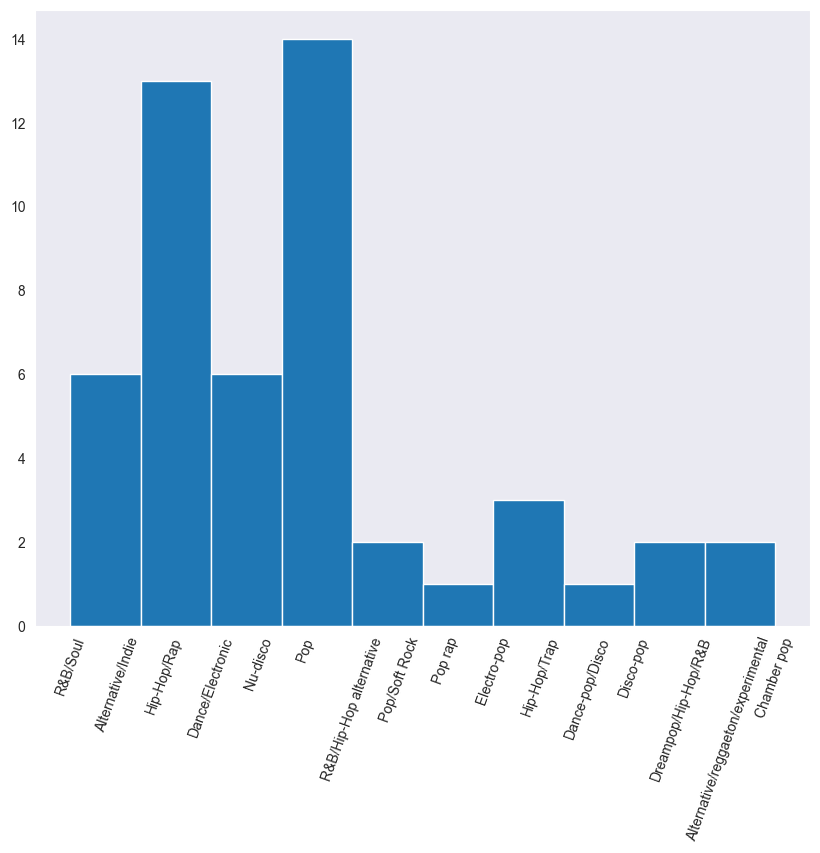

In [590]:
data.genre.hist(grid=False, xrot=70, figsize=(10, 8))

**Conclusion:**
The most popular genre is Pop.

**(3.2.9)**
**Which genres have just one song on the top 50?**
**How many genres in total are represented in the top 50?**

In [591]:
# Count songs of different genres
data.genre.value_counts()

Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
R&B/Soul                               2
 Electro-pop                           2
Nu-disco                               1
R&B/Hip-Hop alternative                1
Pop/Soft Rock                          1
Pop rap                                1
Hip-Hop/Trap                           1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Alternative/reggaeton/experimental     1
Chamber pop                            1
Name: genre, dtype: int64

In [592]:
# Get a dataframe, aggregated and counted by genre
group_by_genre = data.groupby(["genre"]).count().sort_values(by=["track_name"], ascending=False)
group_by_genre

,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
genre,,,,,,,,,,,,,,
Pop,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Hip-Hop/Rap,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Dance/Electronic,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Alternative/Indie,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Electro-pop,2,2,2,2,2,2,2,2,2,2,2,2,2,2
R&B/Soul,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Alternative/reggaeton/experimental,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Chamber pop,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Dance-pop/Disco,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [593]:
# Get a list of genres with just one popular song
least_popular_genres = group_by_genre[group_by_genre.track_name == 1].track_name
least_popular_genres_list = least_popular_genres.index.values.tolist()
print (f"There are {len(least_popular_genres)} genres that have just one popular track.")
least_popular_genres_list

There are 10 genres that have just one popular track.


['Alternative/reggaeton/experimental',
 'Chamber pop',
 'Dance-pop/Disco',
 'Disco-pop',
 'Dreampop/Hip-Hop/R&B',
 'Hip-Hop/Trap',
 'Nu-disco',
 'Pop rap',
 'Pop/Soft Rock',
 'R&B/Hip-Hop alternative']

In [594]:
# the number of unique genres represented in the top-50
all_genres = len(data.genre.unique())
print (f"There are {all_genres} unique genres represented in the dataset.")

There are 16 unique genres represented in the dataset.


**Conclusion:**
There are 16 genres overall in the dataset, 10 among them have just one popular song:
* Alternative/reggaeton/experimental
* Chamber pop
* Dance-pop/Disco
* Disco-pop
* Dreampop/Hip-Hop/R&B
* Hip-Hop/Trap
* Nu-disco
* Pop rap
* Pop/Soft Rock
* R&B/Hip-Hop alternative

### 3.3. Exploring correlations

Let's visualize Pearson correlation of numeric features:

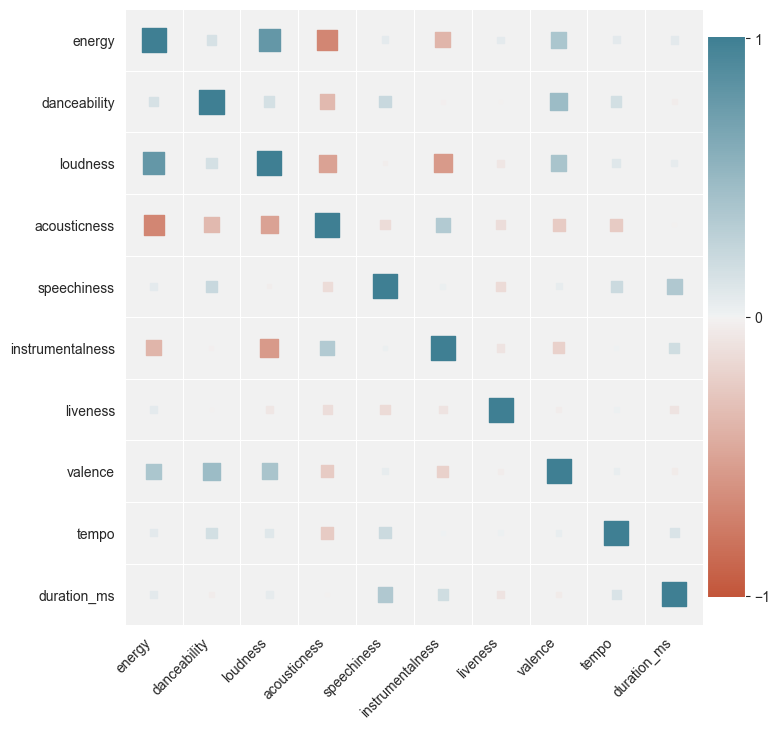

In [595]:
# Visualizing with size and color signifying the magnitude of the correlation
plt.figure(figsize=(8, 8))
plt.title('Pearson Correlation of continuous features')
corrplot(data.corr(numeric_only = True), size_scale=300);

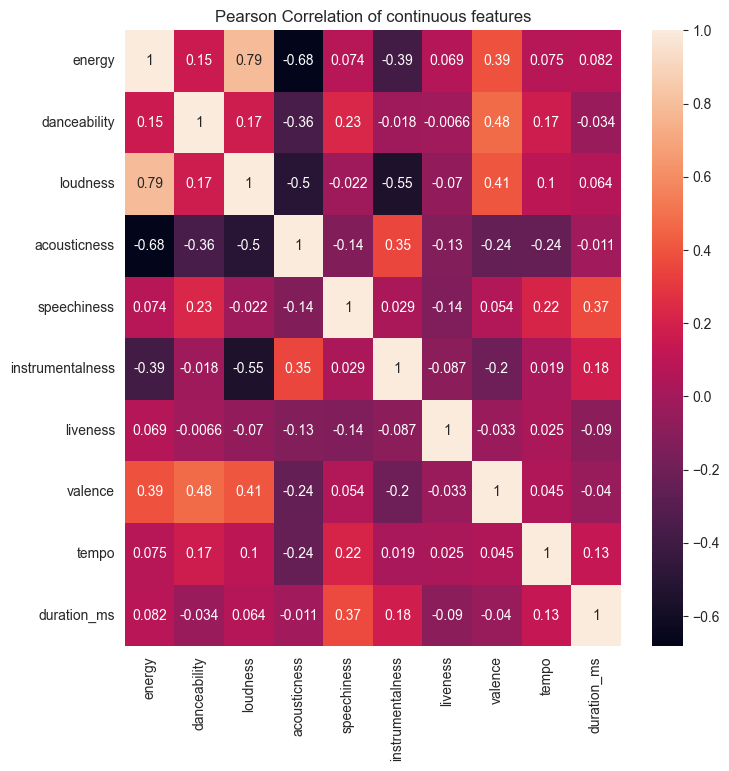

In [596]:
# Plot correlations with annotations
plt.figure(figsize=(8, 8))
plt.title('Pearson Correlation of continuous features')
ax = sns.heatmap(data.corr(numeric_only = True), annot=True)

In [597]:
# create a dataframe with correlations
corr_data = data.corr(numeric_only = True, method='pearson')

# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_data = corr_data.where(np.triu(np.ones(corr_data.shape), k=1).astype(bool))

# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_data.unstack().dropna()

# Sort correlation pairs
sorted_corr_data = unique_corr_pairs.drop_duplicates()
sorted_corr_data.sort_index(inplace=True)
print(sorted_corr_data)

acousticness      danceability       -0.359135
                  energy             -0.682479
                  loudness           -0.498695
danceability      energy              0.152552
duration_ms       acousticness       -0.010988
                  danceability       -0.033763
                  energy              0.081971
                  instrumentalness    0.184709
                  liveness           -0.090188
                  loudness            0.064130
                  speechiness         0.366976
                  tempo               0.130328
                  valence            -0.039794
instrumentalness  acousticness        0.352184
                  danceability       -0.017706
                  energy             -0.385515
                  loudness           -0.553735
                  speechiness         0.028948
liveness          acousticness       -0.128384
                  danceability       -0.006648
                  energy              0.069487
             

**(3.3.1) Which features are strongly positively correlated?**

First, let's see what features have positive correlations:

In [598]:
sorted_corr_data[sorted_corr_data >= 0]

danceability      energy              0.152552
duration_ms       energy              0.081971
                  instrumentalness    0.184709
                  loudness            0.064130
                  speechiness         0.366976
                  tempo               0.130328
instrumentalness  acousticness        0.352184
                  speechiness         0.028948
liveness          energy              0.069487
loudness          danceability        0.167147
                  energy              0.791640
speechiness       danceability        0.226148
                  energy              0.074267
tempo             danceability        0.168956
                  energy              0.075191
                  instrumentalness    0.018853
                  liveness            0.025457
                  loudness            0.102097
                  speechiness         0.215504
                  valence             0.045089
valence           danceability        0.479953
             

Now, let's find features that are strongly positively correlated (correlation above 0.5):

In [599]:
sorted_corr_data[sorted_corr_data >= 0.5]

loudness  energy    0.79164
dtype: float64

**Conclusion:**
In the output of the cell above we can see that only **"loudness"** and **"energy"** features are strongly positively correlated (0.79).

**(3.3.2) Which features are strongly negatively correlated?**

Now, let's see what features are negatively correlated:

In [600]:
sorted_corr_data[sorted_corr_data <= 0]

acousticness      danceability       -0.359135
                  energy             -0.682479
                  loudness           -0.498695
duration_ms       acousticness       -0.010988
                  danceability       -0.033763
                  liveness           -0.090188
                  valence            -0.039794
instrumentalness  danceability       -0.017706
                  energy             -0.385515
                  loudness           -0.553735
liveness          acousticness       -0.128384
                  danceability       -0.006648
                  instrumentalness   -0.087034
                  loudness           -0.069939
                  speechiness        -0.142957
speechiness       acousticness       -0.135392
                  loudness           -0.021693
tempo             acousticness       -0.241119
valence           acousticness       -0.243192
                  instrumentalness   -0.203283
                  liveness           -0.033366
dtype: float6

Let's see what features are strongly negatively correlated (threshold = -0.5)

In [601]:
sorted_corr_data[sorted_corr_data <= -0.5]

acousticness      energy     -0.682479
instrumentalness  loudness   -0.553735
dtype: float64

**Conclusion:**
In the output of the cells above we can see all the features that are negatively correlated.

The features with the strongest negative correlation are:
* "acousticness" and "energy" (-0.68)
* "instrumentalness" and "loudness" (-0.55)

**(3.3.3) Which features are not correlated?**

In [602]:
sorted_corr_data[(-0.03 < sorted_corr_data) & (sorted_corr_data < 0.03)].sort_values(ascending=False)

instrumentalness  speechiness         0.028948
tempo             liveness            0.025457
                  instrumentalness    0.018853
liveness          danceability       -0.006648
duration_ms       acousticness       -0.010988
instrumentalness  danceability       -0.017706
speechiness       loudness           -0.021693
dtype: float64

**Conclusion:**
We can see that there are no perfectly non-correlated features. But there are features with insignificant correlation scores:

* "Instrumentalness" and "speechiness" (0.028)
* "tempo" and "liveness" (0.025)
* "tempo" and "instrumentalness" (0.018)
* **"liveness" and "danceability" (-0.006)**
* "duration_ms" and "acousticness" (-0.01)
* "instrumentalness" and "danceability" (-0.017)
* "speechiness" and "loudness" (-0.021)



## 4. Comparing data

In [603]:
# selecting genres of interest for further comparisons
genres_of_interest = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]

# filtering the dataframe based on genres of interest
filtered_genres_df = data[data.genre.isin(genres_of_interest)]

### 4.1. How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

Let's visualize the danceability score of the observations in genres of interest

In [604]:
filtered_genres_dance = filtered_genres_df[["genre", "danceability"]]

fig = px.scatter(filtered_genres_dance, y="danceability", x="genre", color="danceability")
fig.update_xaxes(title='genre', visible=True, showticklabels=True)
fig.update_yaxes(title='danceability', visible=True, showticklabels=True)
fig.update_layout(title="Comparison of danceability of tracks in Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres")
fig.update_layout(yaxis_range=[0,1])
fig.show()

                   mean_danceability
genre                               
Hip-Hop/Rap                 0.765538
Dance/Electronic            0.755000
Pop                         0.677571
Alternative/Indie           0.661750


<Axes: xlabel='genre'>

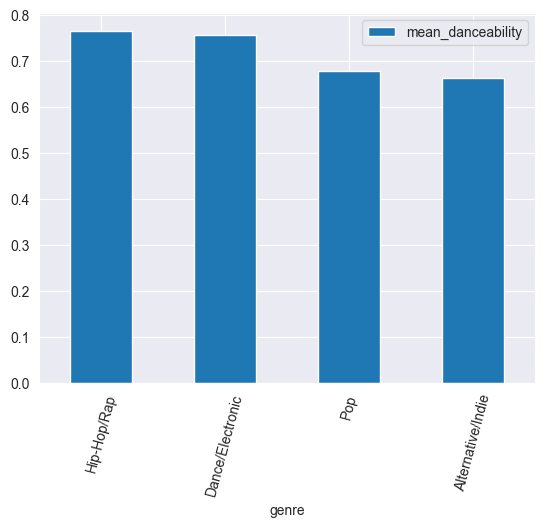

In [605]:
# compare mean danceability of different genres
mean_dance_genre = filtered_genres_dance.groupby(["genre"])\
                                     .mean()\
                                     .sort_values(by="danceability", ascending=False)\
                                     .rename(columns={'danceability':'mean_danceability'})
print (mean_dance_genre)
mean_dance_genre.plot.bar(y='mean_danceability', rot=75)

                   median_danceability
genre                                 
Dance/Electronic                 0.785
Hip-Hop/Rap                      0.774
Pop                              0.690
Alternative/Indie                0.663


<Axes: xlabel='genre'>

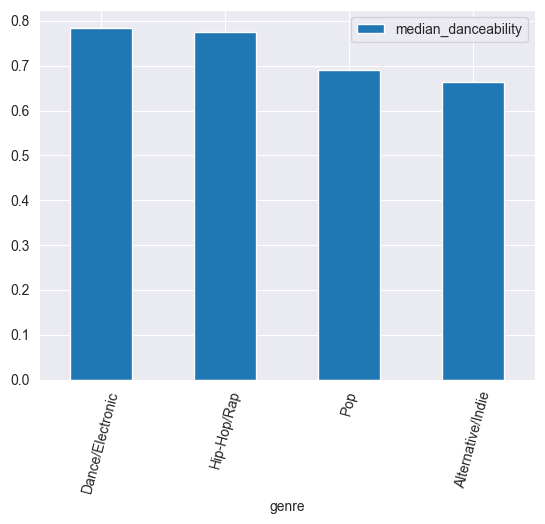

In [606]:
# compare median danceability of different genres
median_dance_genre = filtered_genres_dance.groupby(["genre"])\
                                     .median()\
                                     .sort_values(by="danceability", ascending=False)\
                                     .rename(columns={'danceability':'median_danceability'})
print (median_dance_genre)
median_dance_genre.plot.bar(y='median_danceability', rot=75)

**Conclusions:**

Observing the plots and data above, we can tell that Hip-Hop/Rap on average is more danceable compared to other genres (we have significant share of tracks in this genre, it looks like the majority of tracks of this genre in the Top-50 are pretty danceable).

Dance/Electronic is close second in terms of danceability (Note: we have fewer observations in this genre).

Pop genre has lower mean and median danceability score, and there are many observations. It looks like danceability wasn't the main criteria for getting a Pop track into the Top-50.

Alternative/Indie genre has fewer observations with a bit lower and higher danceability scores. It seems tracks in this genre became popular not due to danceability.

### 4.2. How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

Let's visualize the loudness of the observations in genres of interest

In [607]:
filtered_genres_loudness = filtered_genres_df[["genre", "loudness"]]

fig = px.scatter(filtered_genres_loudness, y="loudness", x="genre", color="loudness")
fig.update_xaxes(title='genre', visible=True, showticklabels=True)
fig.update_yaxes(title='loudness', visible=True, showticklabels=True)
fig.update_layout(title="Comparison of loudness of tracks in Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres")
fig.show()

                   mean_loudness
genre                           
Dance/Electronic       -5.338000
Alternative/Indie      -5.421000
Pop                    -6.460357
Hip-Hop/Rap            -6.917846


<Axes: xlabel='genre'>

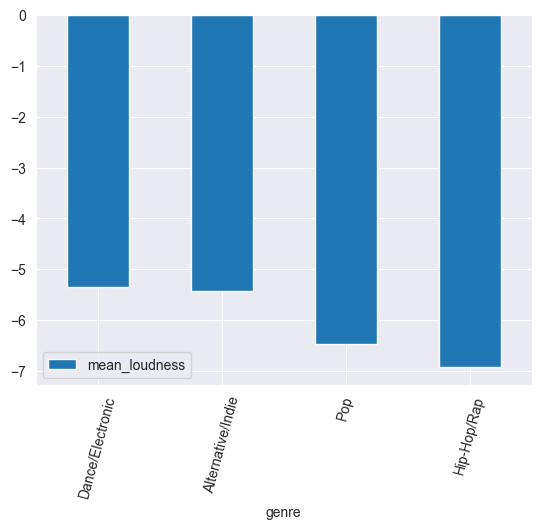

In [608]:
# compare mean loudness of different genres
mean_loudness_genre = filtered_genres_loudness.groupby(["genre"])\
                                     .mean()\
                                     .sort_values(by="loudness", ascending=False)\
                                     .rename(columns={'loudness':'mean_loudness'})
print (mean_loudness_genre)
mean_loudness_genre.plot.bar(y='mean_loudness', rot=75)

                   median_loudness
genre                             
Alternative/Indie          -5.2685
Dance/Electronic           -5.4570
Pop                        -6.6445
Hip-Hop/Rap                -7.6480


<Axes: xlabel='genre'>

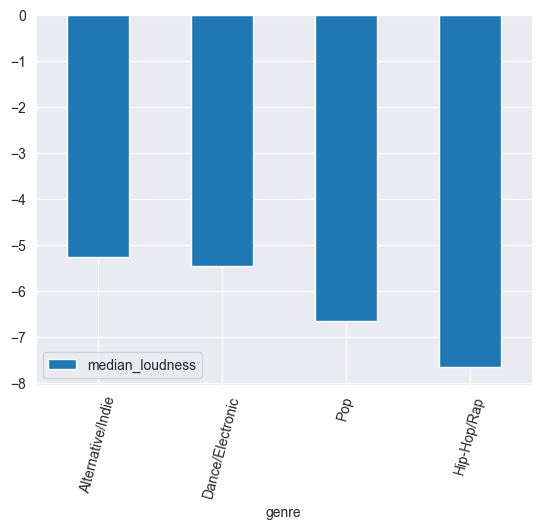

In [609]:
# compare median loudness of different genres
median_loudness_genre = filtered_genres_loudness.groupby(["genre"])\
                                     .median()\
                                     .sort_values(by="loudness", ascending=False)\
                                     .rename(columns={'loudness':'median_loudness'})
print (median_loudness_genre)
median_loudness_genre.plot.bar(y='median_loudness', rot=75)

**Conclusions:**

Based on visualizations above, popular tracks in Alternative/Indie and Dance/Electronic genres are louder, compared to tracks in Pop and Hip-Hop/Rap.

### 4.3. How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

Finally, let's plot the acousticness of the observations in genres of interest

In [610]:
filtered_genres_acousticness = filtered_genres_df[["genre", "acousticness"]]

fig = px.scatter(filtered_genres_acousticness, y="acousticness", x="genre", color="acousticness")
fig.update_xaxes(title='genre', visible=True, showticklabels=True)
fig.update_yaxes(title='acousticness', visible=True, showticklabels=True)
fig.update_layout(title="Comparison of acousticness of tracks in Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres")
fig.update_layout(yaxis_range=[0,1])
fig.show()

                   mean_acousticness
genre                               
Alternative/Indie           0.583500
Pop                         0.323843
Hip-Hop/Rap                 0.188741
Dance/Electronic            0.099440


<Axes: xlabel='genre'>

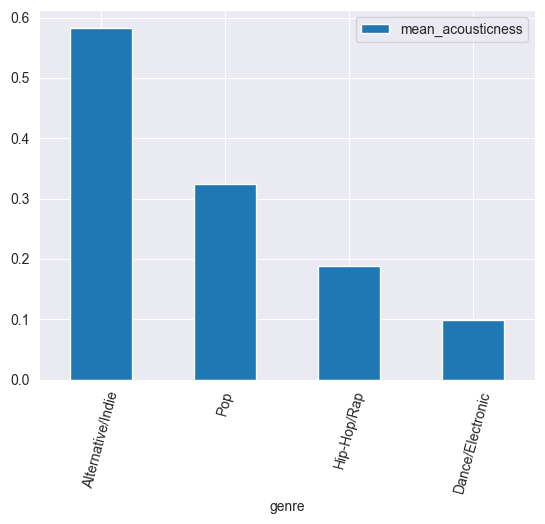

In [611]:
# compare mean acousticness of different genres
mean_acousticness_genre = filtered_genres_acousticness.groupby(["genre"])\
                                     .mean()\
                                     .sort_values(by="acousticness", ascending=False)\
                                     .rename(columns={'acousticness':'mean_acousticness'})
print (mean_acousticness_genre)
mean_acousticness_genre.plot.bar(y='mean_acousticness', rot=75)

                   median_acousticness
genre                                 
Alternative/Indie               0.6460
Pop                             0.2590
Hip-Hop/Rap                     0.1450
Dance/Electronic                0.0686


<Axes: xlabel='genre'>

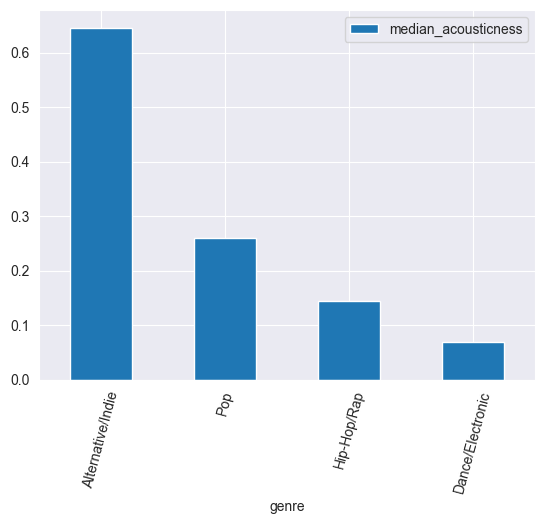

In [612]:
# compare median acousticness of different genres
median_acousticness_genre = filtered_genres_acousticness.groupby(["genre"])\
                                     .median()\
                                     .sort_values(by="acousticness", ascending=False)\
                                     .rename(columns={'acousticness':'median_acousticness'})
print (median_acousticness_genre)
median_acousticness_genre.plot.bar(y='median_acousticness', rot=75)

**Conclusions:**

After observing the plots above, we can conclude that Alternative/Indie genre has the highest acousticness score.

Pop genre also has some of more acoustic tracks, but the majority of observations have low acousticness score.

Popular tracks of Hip-Hop/Rap genre generally have lower acousticness and tracks in Dance/Electronic genre seem to be the least acoustic. Everything lookslogical considering conventional styles of each genre.

## Final thoughts and further analysis

Overall, this dataset is pretty clean (no duplicate or missing observations, no extreme outliers that are out of range).

Regarding the data itself, it tells us some of the characteristics of the most popular tracks on Spotify in 2020, in particular:
* We have discovered what genres, albums, and artists were the most popular that year, how different genres compare in danceability, loudness, and acousticness.
* We've learned that there are strongly correlated features (e.g. loudness and energy), so it would make sense to perform feature reduction.

In **further analysis**, I would like to explore data that was in top 100-200. I am curious to learn what differentiates popular tracks from less popular ones (for example, Alternative/Indie tracks with lower acousticness score don't get too popular, or Spotify users prefer Hip-Hop/Rap songs with higher danceability). Besides that, it would be interesting to explore characteristics of other genres, learn what makes songs by certain artists so special, and discover more info about the target audience.
